# Homework: Learning the tools
Robert Hatem  

## 2. R

In [28]:
# upload libraries
library(MASS)
library(Quandl)
library(ggplot2)
library(stringr)
library(R.cache)
library(quantmod)

In [29]:
# memoization
reload.data = TRUE
QLoad <- R.cache::addMemoization(Quandl::Quandl)

In [54]:
# load data
if (reload.data) {
    Quandl.api_key('wFcUAbwJv3FbxzDwExsY')
    cat("Data Reload/n")
    etfc.raw <- QLoad(c('WIKI/ETFC.11'), start_date="2018-02-05", end_date="2018-03-01")
    hrb.raw <- QLoad(c('WIKI/HRB.11'), start_date="2018-02-05", end_date="2018-03-01")
    }

Data Reload/n

In [55]:
if (reload.data) {
    XSD = QLoad("EOD/HYLS")
    }

In [56]:
# clean col names
etfc <- etfc.raw
hrb <- hrb.raw
names(etfc) <- paste("WIKI.ETFC -",names(etfc))
names(hrb) <- paste("WIKI.HRB -",names(hrb))
names(etfc)[1] <-"Date"
names(hrb)[1] <-"Date"
raw_data = merge(etfc, hrb)
names(raw_data)

[1] "Date"                   "WIKI.ETFC - Adj. Close" "WIKI.HRB - Adj. Close"

In [57]:
# clean col names more
clean.quandl.name <- function(x) {
    cleaned <- x
    if (x=='Date') {
        
    } else {
        tryCatch({
                    parts <- stringr::str_split(x, " - ",n=2)
                    first.parts <- stringr::str_split(parts[[1]][[1]], "\\.",n=2)
                    cleaned <- paste(first.parts[[1]][[2]], parts[[1]][[2]], sep=".")
                    cleaned <- str_replace_all(cleaned," ","")
                    },
                 error = function(e) {cat(paste0("Err on",x,"\n"))}
                 )
    }
    stringr::str_trim(cleaned)
}

In [58]:
fixed.names <- lapply(names(raw_data),clean.quandl.name)
cat(paste(fixed.names,sep="\n"))
renamed_data <- raw_data
names(renamed_data) <- fixed.names

Date ETFC.Adj.Close HRB.Adj.Close

In [62]:
# returns
renamed_data$ETFC.returns = Delt(renamed_data$ETFC.Adj.Close)
renamed_data$HRB.returns = Delt(renamed_data$HRB.Adj.Close)

In [65]:
# regressions
lm1 = lm(HRB.Adj.Close ~ ETFC.Adj.Close, data=renamed_data)
lm2 = lm(HRB.returns ~ ETFC.returns, data=renamed_data)

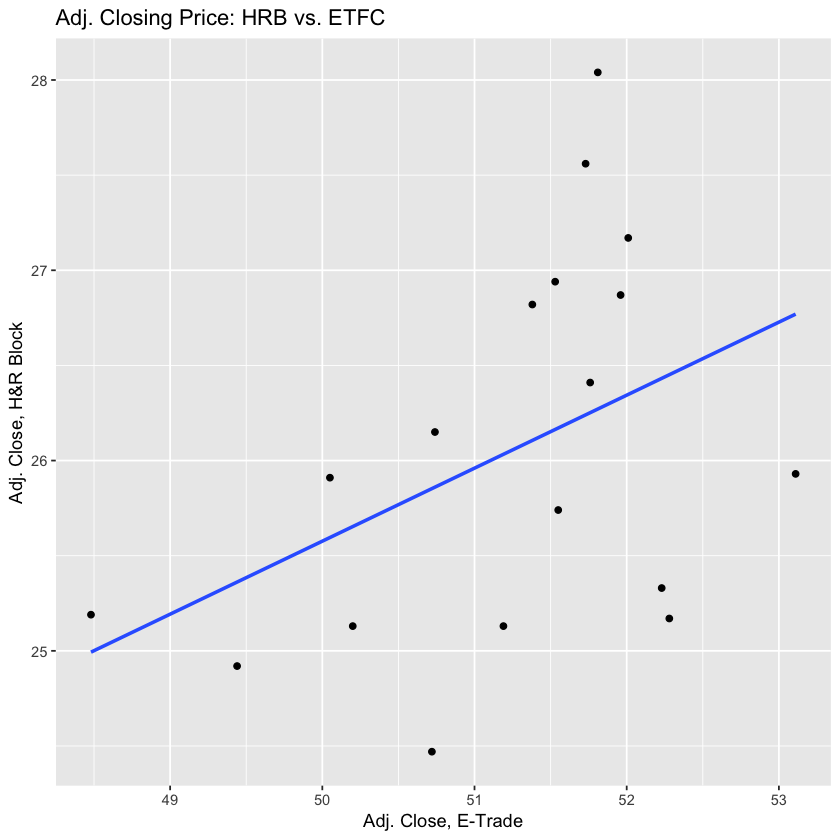

In [101]:
# plot
gp <- ggplot(data=renamed_data, aes(x=ETFC.Adj.Close, y=HRB.Adj.Close, na.rm = TRUE))
gp = gp +geom_point()+geom_smooth(method=lm, se=FALSE)
gp = gp + ggtitle("Adj. Closing Price: HRB vs. ETFC")
gp = gp + xlab('Adj. Close, E-Trade') + ylab('Adj. Close, H&R Block')
print(gp)

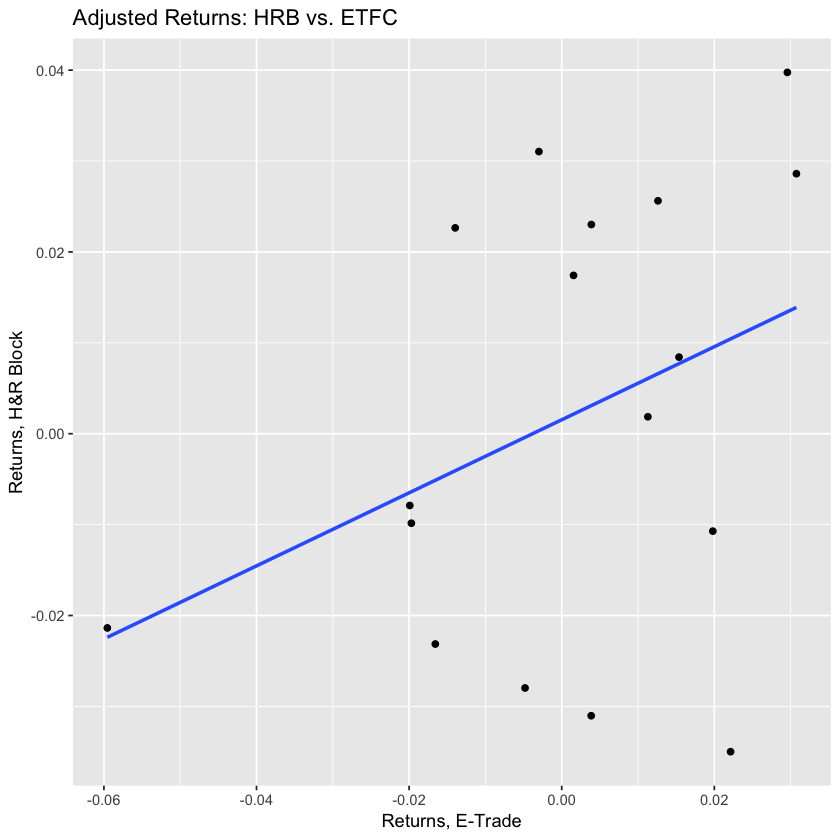

In [94]:
# plot
gp1 <- ggplot(data=subset(renamed_data, !is.na(ETFC.returns)), aes(x=ETFC.returns, y=HRB.returns, na.rm = TRUE))+geom_point()
gp1 = gp1 + geom_smooth(method=lm, se=FALSE)
gp1 = gp1 + ggtitle("Adjusted Returns: HRB vs. ETFC")
gp1 = gp1 + xlab('Returns, E-Trade') + ylab('Returns, H&R Block')
print(gp1)